In [3]:
from IPython.display import Image

import hashlib, re, time

## Introduction

In [4]:
print(
    "Eric Cartman",
    "\t" * 5,
    "Computer Nerd",
)
Image(
    "./comic-images/south-park-computer.gif",
)


import IPython.display as display
import ipywidgets as widgets

img1 = open("./comic-images/cartman_curious_about_meta.webp", "rb").read()
img2 = open("./comic-images/south-park-computer.gif", "rb").read()
wi1 = widgets.Image(value=img1, format="jpg", width=300, height=400)
wi2 = widgets.Image(value=img2, format="jpg", width=300, height=400)
a = [wi1, wi2]
wid = widgets.HBox(a)
display.display(wid)

Eric Cartman 					 Computer Nerd


Cartman signed up on a website 
username: Eric Theodore Cartman
password: cartman@1900
DOB: 11-11-1900


backdrop: 
- Cartman has history of weak passwords. 
- Computer Nerd enjoy cracking weak passwords and getting access to other accounts.

### How Computer Nerd was able to crack password

<h2> READ THE NAMES AND SECTION INFO FROM CANVAS </h2>

<div>
<img src="./names.png" width="1000"/>
</div>

In [6]:
with open("input.txt") as fp:
    data = fp.readlines()

dct = {}
for item in data:
    if item.split("\t")[0] not in dct and "\t" in item:
        item = re.sub(r"\([^)]*\)", "", item)
        name = item.split("\t")[0]
        dct[name] = []
    elif "MSDS" in item:
        dct[name].append(int(item.strip().split("-")[-1]))

In [7]:
# with open("hashes.txt", "w") as fp:
#     for key in dct:
#         fp.write(hashlib.sha256(key.encode()).hexdigest() + " " + key+ "\n")

<h2> CREATE A FUNCTION TO GET THE HASH VALUE </h2>

In [8]:
def check_hash(filename, lst):
    with open(filename, "r") as fp:
        hashes = fp.readlines()
    hashes = [item.strip() for item in hashes]

    for value in lst:
        for hash in hashes:
            if hash.split()[0] == value:
                time.sleep(1)
                print(value + " --> " + " ".join(hash.split()[1:]))

In [9]:
hash_val = [
    "d5eb8088a5de2a2c7c866e9837104648e836fae9e3eff070e14bb1d215d0ddfe",
    "b42250c5c57f937e5dd710f875b30a4e7e4c08a736a9b69cc2eea7c89af5a0ce",
    "b3cf6301d3bc446f98ffd58a288d78e4fc9024ba8a3531c28664b51caff4f423",
]
hash_val

['d5eb8088a5de2a2c7c866e9837104648e836fae9e3eff070e14bb1d215d0ddfe',
 'b42250c5c57f937e5dd710f875b30a4e7e4c08a736a9b69cc2eea7c89af5a0ce',
 'b3cf6301d3bc446f98ffd58a288d78e4fc9024ba8a3531c28664b51caff4f423']

In [10]:
check_hash("hashes.txt", hash_val)

d5eb8088a5de2a2c7c866e9837104648e836fae9e3eff070e14bb1d215d0ddfe --> Chris Nishimura
b42250c5c57f937e5dd710f875b30a4e7e4c08a736a9b69cc2eea7c89af5a0ce --> Sai Vamsi Pujari
b3cf6301d3bc446f98ffd58a288d78e4fc9024ba8a3531c28664b51caff4f423 --> Tri Cao


<h2> Create a list of hashcodes for each person in our Class section </h2>

In [11]:
def section_dct(name_dct, section):
    section_dct = {}
    for key, value in name_dct.items():
        if section in value:
            section_dct[key] = hashlib.sha256(key.encode()).hexdigest()
    return section_dct


section3 = section_dct(dct, 3)
list(section3.values())

['d5c8601e241f64da007657eebde9ab135213566a275a924fe2f8cf2e0d5e7785',
 '19b97ce2fbcd16d4b9273fb064da85817ddd041db1dd8754d9924e34db24a434',
 '69fe8700fffbc840ba6df20c3e2d06bb6c037130ac8da1cb15f9ef33ee26f02e',
 'b3cf6301d3bc446f98ffd58a288d78e4fc9024ba8a3531c28664b51caff4f423',
 '922f6afd37630b4457ca82e128d8fc0c642da0eab738da0788c20f53f8e49a62',
 '211357d4691b1d2daabfebee47d9b68cfc75fea21f1748d770d782bab349989a',
 '4d81c6ebf68cb8f54401b07c91bcdbfea74d55c8c33d3a3a296c1dde22bdcba2',
 '60b6f61f37ed8455d85cb8cd5c24ddb48ce08f28580a70b87c92a2ac7348c9f1',
 'c2a33d8d9bb6e74fbcc68f13254621bddf0e26f98817798a2ce0777db4b309f1',
 '17b611e6326c2b0c0453349a8fccbca6e37d92348668cd023f2da43f6799e340',
 '847f203df59c98aa96f035d3369e1f87651ad0b39b6300fa50b7606e904d8fa6',
 '10f7f20716cb60917d05467f0bf6757bbbb5c89a1078c96e1523c8d3ebe64844',
 'a67cf09ee2c02bf76e37560e96d0626481f71f79d3d282370f744ffbcf6a571c',
 '4ae99b71de5eaeeb67fffbf92e89f5ff0628231c7bc8cd6fb2a45067485406f6',
 'e4a98d0057ea0c4866bb5a4a851b4e26

<h2> See if there is a match and return the value </h2>

In [12]:
check_hash("hashes.txt", section3.values())

d5c8601e241f64da007657eebde9ab135213566a275a924fe2f8cf2e0d5e7785 --> Solomon Asiedu-Ofei
19b97ce2fbcd16d4b9273fb064da85817ddd041db1dd8754d9924e34db24a434 --> Sai Pranavi Avadhanam
69fe8700fffbc840ba6df20c3e2d06bb6c037130ac8da1cb15f9ef33ee26f02e --> Samuel Campione
b3cf6301d3bc446f98ffd58a288d78e4fc9024ba8a3531c28664b51caff4f423 --> Tri Cao
922f6afd37630b4457ca82e128d8fc0c642da0eab738da0788c20f53f8e49a62 --> Jeffrey Chen
211357d4691b1d2daabfebee47d9b68cfc75fea21f1748d770d782bab349989a --> Robert Clements
4d81c6ebf68cb8f54401b07c91bcdbfea74d55c8c33d3a3a296c1dde22bdcba2 --> Yen-Hsin Fang
60b6f61f37ed8455d85cb8cd5c24ddb48ce08f28580a70b87c92a2ac7348c9f1 --> Nithin Kumar
c2a33d8d9bb6e74fbcc68f13254621bddf0e26f98817798a2ce0777db4b309f1 --> Mark Lam
17b611e6326c2b0c0453349a8fccbca6e37d92348668cd023f2da43f6799e340 --> Nick Miller
847f203df59c98aa96f035d3369e1f87651ad0b39b6300fa50b7606e904d8fa6 --> Rishi Mohan
10f7f20716cb60917d05467f0bf6757bbbb5c89a1078c96e1523c8d3ebe64844 --> Ranjeet Nagarkar


<h2> This is especially important for password breaches </h2>

In [9]:
leaked_info = {
    "robertc@usfca.edu": "4007d46292298e83da10d0763d95d5139fe0c157148d0587aa912170414ccba6",
    "diane@usfca.edu": "5dd46878bb0b580b3086cfd1091b7bf6204c7bd521f6ac371226367241c3ab53",
    "President@USA.gov": "4404f5b7a8836863b4bf63b9958024b6fc9074f0f0480ed8115e4168760e505e",
    "elonmusk@mars.com": "954c7a1f84096998e6df172544976b0f8357d9d545c0f5ffa0d7ca839ee8a383",
    "snoop_dogg@rap.net": "7a2551f897f10a3a5a041243af9e0cf5b37bbd82c3c0b24cb3513b21f88b042c",
}
leaked_info

{'robertc@usfca.edu': '4007d46292298e83da10d0763d95d5139fe0c157148d0587aa912170414ccba6',
 'diane@usfca.edu': '5dd46878bb0b580b3086cfd1091b7bf6204c7bd521f6ac371226367241c3ab53',
 'President@USA.gov': '4404f5b7a8836863b4bf63b9958024b6fc9074f0f0480ed8115e4168760e505e',
 'elonmusk@mars.com': '954c7a1f84096998e6df172544976b0f8357d9d545c0f5ffa0d7ca839ee8a383',
 'snoop_dogg@rap.net': '7a2551f897f10a3a5a041243af9e0cf5b37bbd82c3c0b24cb3513b21f88b042c'}

In [10]:
check_hash("common_passwords.txt", leaked_info.values())

4007d46292298e83da10d0763d95d5139fe0c157148d0587aa912170414ccba6 --> robert
5dd46878bb0b580b3086cfd1091b7bf6204c7bd521f6ac371226367241c3ab53 --> timber
4404f5b7a8836863b4bf63b9958024b6fc9074f0f0480ed8115e4168760e505e --> badass
954c7a1f84096998e6df172544976b0f8357d9d545c0f5ffa0d7ca839ee8a383 --> srinivas
7a2551f897f10a3a5a041243af9e0cf5b37bbd82c3c0b24cb3513b21f88b042c --> weed420


<h2> So Now We Know How to Psudo-Decode Passwords </h2>
<p> * If we know the hash, we may be able to find the password if it's common
<p>* It becomes extra important to use a unique password for every site

the history repeated: Cartman account is hacked by Computer Nerd


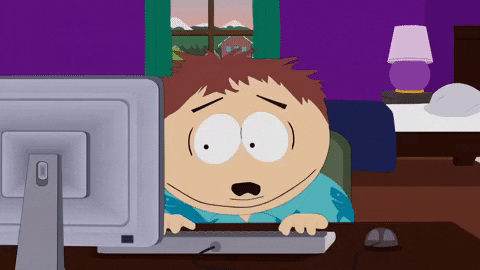

In [14]:
print(
    "the history repeated: Cartman account is hacked by Computer Nerd",
)
Image(
    "./comic-images/cartman_confused.gif",
)

#### Cartman wanted to learn how to build strong passwords
- signed up for workshop on Hash function after learning about hashing.

In [27]:
# %load "./generate_password.py"
## Author: Eric Cartman

import re
import datetime
import argparse
from urllib.parse import urlparse


def count_vowels(string):
    return sum(1 for char in string if char.lower() in "aeiou")


def strip_vowels(string):
    vowels = ["a", "i", "e", "o", "u"]
    response = []
    for c in string.lower():
        if not c in vowels and c != " ":
            response.append(c)

    return "".join(response)


def extract_domain(url):
    parsed_url = urlparse(url)
    # Split the domain from the netloc
    subdomain = parsed_url.netloc.split(".")[1]
    return subdomain


def print_state(state):
    print(f"INFO: update : {state}")


def get_a_password(given_name, last_name):
    vowels = ["a", "i", "e", "o", "u"]
    full_name = f"{given_name} {last_name}".lower()
    nwords = len(full_name.split())
    nvowels = count_vowels(full_name)

    print(f"Found {nvowels} vowels in the given and last name")

    curr_date = datetime.datetime.now().day

    l1_str = list(strip_vowels(full_name))

    print_state(strip_vowels(full_name))

    if nwords < len(l1_str):
        l1_str[nwords] = l1_str[nwords].upper()
        print(
            f"- Calc the no of words in {full_name} and Capitalise the char at index-{nwords}"
        )
        print_state("".join(l1_str))

    if nvowels < len(l1_str):
        l1_str[nvowels] = l1_str[nvowels].upper()
        print(f"- Capitalise the char at index-{nvowels} using no. of vowels")
        print_state("".join(l1_str))
    else:
        l1_str.append(str(nvowels))
        print_state("".join(l1_str))
        print(f"- Append the no. of vowels {nvowels}")

        l1_str.append(chr(curr_date * nvowels))
        print_state("".join(l1_str))
        print(
            f"- Append char represented by chr(current_date * no of vowels found in full-name)"
        )
    return "".join(l1_str[::-1])


# get_a_password("Eric Theodore", "Cartman")


def get_strong_password(
    given_name="Sai Vamsi",
    last_name="Pujari",
    url=None,  # "www.meta.com",
    dob=None,  # "01-01-1900",
):
    baseline_password = get_a_password(given_name, last_name)

    if url is None and dob is None:
        print("Generating a password of strength: moderate ...")
        return baseline_password, 0

    print("Building a strong password ...")

    url = url if url.startswith("https://") else "https://" + url
    org_name = extract_domain(url)

    strong_password = (
        baseline_password + ":" + "".join(set(strip_vowels(org_name)[::-1]))
    )

    print_state(strong_password)
    print(f"- Append ':' and Reverse of vowel striped website name '")

    dob_sum = sum(int(char) for char in dob if char.isdigit())
    extra_char = "\." if dob_sum % 2 == 0 else "/."

    strong_password = strong_password + str(dob_sum % 10)
    print_state(strong_password)
    print(f"- Append last digit in the (Sum of digits in date of birth)")

    strong_password += extra_char
    print_state(strong_password)
    print(f"- Append '\.' when sum of digits in dob is even else '/.'")

    return strong_password, 1


# get_strong_password(
#     given_name="Sai Vamsi", last_name="Pujari", url="www.meta.com", dob='11-11-1900'
# )


# function_with_args.py


def main():
    parser = argparse.ArgumentParser(description="Description of your program")
    parser.add_argument(
        "--given_name",
        type=str,
        required=True,
        help="provide givenname either 'firstname' or 'firstname middlename'",
    )
    parser.add_argument(
        "--last_name", type=str, required=True, help="provide last name"
    )
    parser.add_argument(
        "--url", type=str, default=None, help="provide url of the website"
    )
    parser.add_argument(
        "--dob",
        type=str,
        default=None,
        help="date of birth or date of interset in 'MM-DD-YYYY'",
    )
    args = parser.parse_args()
    response, level = get_strong_password(
        args.given_name, args.last_name, args.url, args.dob
    )

    strength = ["moderate", "strong"]

    print(f"Generated passcode: {response} \nStrength: {strength[level]}")


# if __name__ == "__main__":
#     main()


# generate_password.py --given_name 'Sai Vamsi' --last_name 'Pujari'
# generate_password.py --given_name 'Sai Vamsi' --last_name 'Pujari' --url 'www.meta.com' --dob '11-11-1900'

		 Cartman end of the hashing workshop


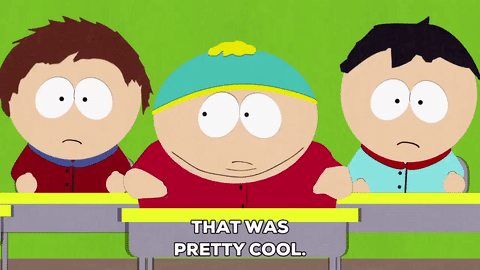

In [32]:
print("\t" * 2, "Cartman end of the hashing workshop")
Image(
    "./comic-images/cartman_end_of_the_class.gif",
)

		 Cartman implementing his personal hash-function


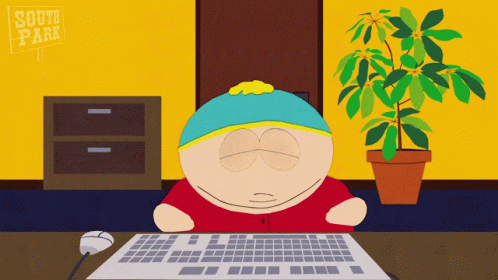

In [35]:
print("\t" * 2, "Cartman implementing his personal hash-function")
Image(
    "./comic-images/cartman_achieved.gif",
)

In [36]:
get_a_password("Eric Theodore", "Cartman")

Found 8 vowels in the given and last name
INFO: update : rcthdrcrtmn
- Calc the no of words in eric theodore cartman and Capitalise the char at index-3
INFO: update : rctHdrcrtmn
- Capitalise the char at index-8 using no. of vowels
INFO: update : rctHdrcrTmn


'nmTrcrdHtcr'

In [29]:
get_strong_password(
    given_name="Eric Theodore",
    last_name="Cartman",
    url="www.meta.com",
    dob="11-11-1900",
)

Found 8 vowels in the given and last name
INFO: update : rcthdrcrtmn
- Calc the no of words in eric theodore cartman and Capitalise the char at index-3
INFO: update : rctHdrcrtmn
- Capitalise the char at index-8 using no. of vowels
INFO: update : rctHdrcrTmn
Building a strong password ...
INFO: update : nmTrcrdHtcr:tm
- Append ':' and Reverse of vowel striped website name '
INFO: update : nmTrcrdHtcr:tm4
- Append last digit in the (Sum of digits in date of birth)
INFO: update : nmTrcrdHtcr:tm4\.
- Append '\.' when sum of digits in dob is even else '/.'


('nmTrcrdHtcr:tm4\\.', 1)

https://www.passwordmonster.com

		 Happy Cartman


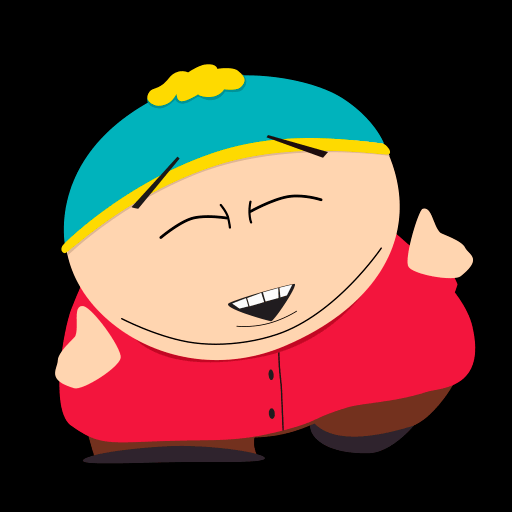

In [37]:
print("\t" * 2, "Happy Cartman")
Image(
    "./comic-images/happy cartman.gif",
)